In [20]:
import pandas as pd
import numpy as np
import os

In [21]:
base_dir = 'C:/Users/wampl/sxwOBA/'

In [22]:
df = pd.read_csv(os.path.join(base_dir, 'statcast_data', '2023.csv'))

In [28]:
bbe_2021 = pd.read_csv(os.path.join(base_dir, 'statcast_data', 'bbe', 'bbe_2021.csv'))
bbe_2022 = pd.read_csv(os.path.join(base_dir, 'statcast_data', 'bbe', 'bbe_2022.csv'))
bbe_2023 = pd.read_csv(os.path.join(base_dir, 'statcast_data', 'bbe', 'bbe_2023.csv'))

bbe_all = pd.concat([bbe_2021, bbe_2022, bbe_2023])

In [29]:
bbe_all.loc[:, ['launch_angle', 'launch_speed', 'sprint_speed', 'pull', 'oppo', 'delta_run_exp']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311781 entries, 0 to 69106
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   launch_angle   311781 non-null  float64
 1   launch_speed   311781 non-null  float64
 2   sprint_speed   311781 non-null  float64
 3   pull           311781 non-null  int64  
 4   oppo           311781 non-null  int64  
 5   delta_run_exp  311780 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 16.7 MB


In [30]:
bbe_all.loc[bbe_all['delta_run_exp'].isna(),['des', 'outs_when_up', 'on_1b', 'on_2b', 'on_3b', 'events', 'delta_run_exp']]

,des,outs_when_up,on_1b,on_2b,on_3b,events,delta_run_exp
41447,"Yordan Alvarez grounds out, first baseman Bobb...",0,NaN,NaN,NaN,field_out,NaN


In [31]:
bbe_all = bbe_all.dropna(subset=['delta_run_exp'])

In [32]:
bbe_all.loc[:, ['launch_angle', 'launch_speed', 'sprint_speed', 'pull', 'oppo', 'delta_run_exp']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311780 entries, 0 to 69106
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   launch_angle   311780 non-null  float64
 1   launch_speed   311780 non-null  float64
 2   sprint_speed   311780 non-null  float64
 3   pull           311780 non-null  int64  
 4   oppo           311780 non-null  int64  
 5   delta_run_exp  311780 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 16.7 MB


In [33]:
df.iloc[:10000, :].to_csv(os.path.join(base_dir, 'statcast_data', '2023_10k.csv'), index=False)

In [34]:
df.events.value_counts()

field_out                       40547
strikeout                       23181
single                          14587
walk                             8536
double                           4647
home_run                         3151
force_out                        2019
grounded_into_double_play        1923
hit_by_pitch                     1143
sac_fly                           700
field_error                       585
triple                            375
sac_bunt                          237
double_play                       222
fielders_choice                   208
fielders_choice_out               158
caught_stealing_2b                119
catcher_interf                     64
strikeout_double_play              58
other_out                          12
sac_fly_double_play                11
pickoff_caught_stealing_2b          7
pickoff_1b                          7
caught_stealing_home                7
caught_stealing_3b                  5
wild_pitch                          4
pickoff_3b  

In [10]:
df.loc[df['description']=='hit_into_play', 'events'].value_counts()

field_out                    40546
single                       14587
double                        4647
home_run                      3151
force_out                     2019
grounded_into_double_play     1923
sac_fly                        700
field_error                    585
triple                         375
sac_bunt                       237
double_play                    222
fielders_choice                208
fielders_choice_out            158
sac_fly_double_play             11
catcher_interf                  11
Name: events, dtype: int64

In [11]:
df.loc[df['description']=='hit_into_play', 'events'].unique().tolist()

['field_out',
 'single',
 'grounded_into_double_play',
 'double',
 'force_out',
 'home_run',
 'sac_fly',
 'field_error',
 'triple',
 'fielders_choice',
 'sac_bunt',
 'double_play',
 'fielders_choice_out',
 'sac_fly_double_play',
 'catcher_interf']

In [12]:
df.loc[df['description']=='hit_into_play'].groupby(['events'], as_index=False)['delta_run_exp'].agg(['mean', 'std']).round(2).head(50)

,mean,std
events,,
catcher_interf,0.44,0.22
double,0.78,0.44
double_play,-0.32,0.14
field_error,0.42,0.23
field_out,-0.24,0.13
fielders_choice,0.74,0.21
fielders_choice_out,-0.33,0.13
force_out,-0.43,0.18
grounded_into_double_play,-0.49,0.14


In [13]:
df.loc[df['description']=='hit_into_play'].groupby(['events', 'outs_when_up'], as_index=False)['delta_run_exp'].agg(['mean', 'std']).round(2).head(60)

mean   std
events                    outs_when_up            
catcher_interf            0             0.59  0.15
                          1             0.42  0.18
                          2             0.16  0.02
double                    0             0.79  0.28
                          1             0.78  0.43
                          2             0.77  0.58
double_play               0            -0.37  0.13
                          1            -0.30  0.14
field_error               0             0.46  0.12
                          1             0.42  0.21
                          2             0.38  0.32
field_out                 0            -0.25  0.09
                          1            -0.22  0.11
                          2            -0.23  0.17
fielders_choice           0             0.75  0.16
                          1             0.75  0.19
                          2             0.50  0.43
fielders_choice_out       0            -0.33  0.13
                          1            -0.32  0.14
                          2            -0.37  0.11
force_out                 0            -0.48  0.14
                          1            -0.47  0.17
                          2            -0.36  0.18
grounded_into_double_play 0            -0.52  0.10
                          1            -0.47  0.16
home_run                  0             1.16  0.31
                          1             1.37  0.48
                          2             1.65  0.68
sac_bunt                  0            -0.02  0.11
                          1             0.08  0.14
sac_fly                   0            -0.34  0.10
                          1            -0.24  0.17
sac_fly_double_play       0            -0.38  0.03
                          1            -0.28  0.19
single                    0             0.49  0.20
                          1             0.48  0.28
                          2             0.48  0.43
triple                    0             1.08  0.31
                          1             1.03  0.48
                          2             1.05  0.75

In [35]:
def train_model(year, bbe, target='woba_value'):
    import pandas as pd
    import numpy as np
    import xgboost as xgb
    import joblib
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_val_score

    X = bbe[['launch_speed', 'launch_angle', 'sprint_speed']]
    y = bbe[target].to_numpy()
    

    # Train a random forest regression model based on exit velocity and launch angle and using cross-validation to measure performance

    model1 = xgb.XGBRegressor(tree_method='gpu_hist',
                                n_estimators=100,
                                max_depth=6,
                                min_child_weight=1,
                                gamma=0,
                                subsample=1,
                                colsample_bytree=1)  

    model2 = xgb.XGBRegressor(tree_method='gpu_hist')

    prob_model = RandomForestClassifier(
        n_estimators=100
    )
    if target == 'woba_value':
        try:
            model1 = joblib.load('models/rf_xwoba_model.joblib')

        except:
            print("CV xwOBA fit (R^2):") 
            print(cross_val_score(model1, X, y, cv=5))
            model1.fit(X, y)
    else:
        print("CV xwOBA fit (R^2):") 
        print(cross_val_score(model1, X, y, cv=5))
        model1.fit(X, y)
        

    y_pred = model1.predict(X)


    ## Grouping events by batter to get mean xwOBAcon for each player
    bbe['rf_xwoba'] = y_pred

    X_spray = bbe[['launch_speed', 'launch_angle', 'sprint_speed', 'pull', 'oppo']]
    y_spray = bbe[target].to_numpy()

    if target == 'woba_value':
        try:
                model2 = joblib.load('models/w.joblib')
        except:
            print("CV Spray angle xwOBA fit (R^2):") 
            print(cross_val_score(model2, X_spray, y_spray, cv=5))
            model2.fit(X_spray, y_spray)
    else:
        print("CV Spray angle xwOBA fit (R^2):") 
        print(cross_val_score(model2, X_spray, y_spray, cv=5))
        model2.fit(X_spray, y_spray)

    y_pred_spray = model2.predict(X_spray)

    bbe['sxwOBA'] = y_pred_spray

    prob_model.fit(X_spray, bbe['target'].to_numpy())
    probs = prob_model.predict_proba(X_spray)

    bbe['sxwoba_probs'] = list(probs)
    lweights = np.array([0, 0.9, 1.25, 1.6, 2, 0, 0.9])
    sxwoba = probs.dot(lweights)
    bbe['sxwoba_prob_model'] = sxwoba
    bbe['sxwoba_prob_model'] = bbe['sxwoba_prob_model'].where(bbe['events']!='walk', 0.689)
    bbe['sxwoba_prob_model'] = bbe['sxwoba_prob_model'].where(bbe['events']!='hit_by_pitch', 0.720)
    bbe['sxwoba_prob_model'] = bbe['sxwoba_prob_model'].where(bbe['events']!='strikeout', 0)

    return bbe

In [36]:
bbe_result = train_model(2023, bbe_all, target='delta_run_exp')

CV xwOBA fit (R^2):
[0.34771308 0.33876311 0.33529349 0.32701713 0.34038491]
CV Spray angle xwOBA fit (R^2):
[0.39672337 0.38217873 0.38472114 0.37659258 0.38754779]


In [37]:
bbe_result['sxwOBA'].describe()

count    311780.000000
mean          0.055348
std           0.337739
min          -0.718504
25%          -0.194544
50%          -0.060116
75%           0.212946
max           2.749346
Name: sxwOBA, dtype: float64

<AxesSubplot: >

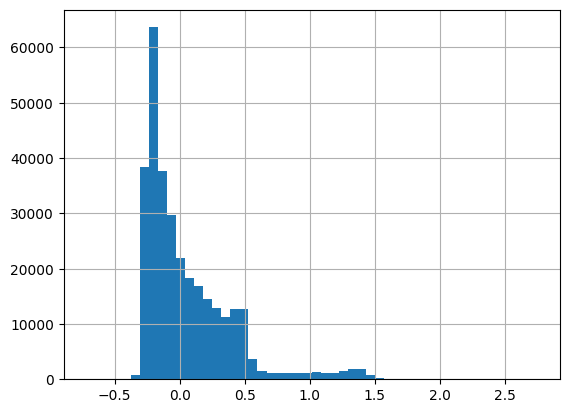

In [39]:
bbe_result['sxwOBA'].hist(bins=50)

<AxesSubplot: >

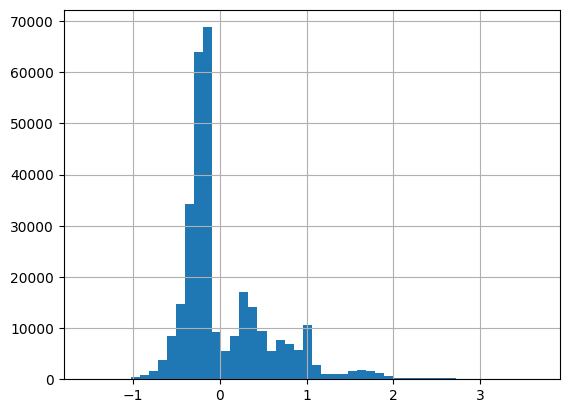

In [61]:
bbe_result['delta_run_exp'].hist(bins=50)

In [43]:
bbe_result.groupby(['events'], as_index=False)['sxwOBA', 'delta_run_exp'].mean().round(2)

C:\Users\wampl\AppData\Local\Temp\ipykernel_8484\619999667.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bbe_result.groupby(['events'], as_index=False)['sxwOBA', 'delta_run_exp'].mean().round(2)


,events,sxwOBA,delta_run_exp
0,double,0.32,0.77
1,double_play,0.08,-0.36
2,field_error,-0.07,0.44
3,field_out,-0.09,-0.23
4,fielders_choice,-0.08,0.71
5,fielders_choice_out,-0.10,-0.32
6,force_out,-0.11,-0.43
7,grounded_into_double_play,-0.09,-0.50
8,home_run,1.01,1.38
9,sac_bunt,-0.07,-0.06


In [63]:
bbe_result.loc[bbe_result['events']=='grounded_into_double_play', ['events', 'sxwOBA', 'delta_run_exp', 'launch_speed', 'launch_angle']].sort_values('sxwOBA', ascending=True).head(50)

,events,sxwOBA,delta_run_exp,launch_speed,launch_angle
57949,grounded_into_double_play,-0.620837,-1.118,115.4,-13.0
16719,grounded_into_double_play,-0.536029,-0.389,100.4,-33.0
8065,grounded_into_double_play,-0.503578,-0.641,118.3,-10.0
42120,grounded_into_double_play,-0.357672,-0.323,106.7,-27.0
14940,grounded_into_double_play,-0.354842,-0.495,103.9,-11.0
116335,grounded_into_double_play,-0.349168,-0.354,95.0,-33.0
77241,grounded_into_double_play,-0.346970,-0.284,109.9,-20.0
102711,grounded_into_double_play,-0.340708,-0.590,106.3,-26.0
7531,grounded_into_double_play,-0.339098,-0.380,95.4,-37.0
80634,grounded_into_double_play,-0.337539,-0.869,110.0,-20.0


In [57]:
leaders = bbe_result.groupby('player_name')['sxwOBA', 'delta_run_exp'].agg(['mean', 'sum', 'count']).reset_index()

C:\Users\wampl\AppData\Local\Temp\ipykernel_8484\1635277079.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  leaders = bbe_result.groupby('player_name')['sxwOBA', 'delta_run_exp'].agg(['mean', 'sum', 'count']).reset_index()


In [60]:
leaders.sort_values(by=('sxwOBA', 'count'), ascending=False).head(50)

player_name    sxwOBA                   delta_run_exp           \
                              mean         sum count          mean      sum   
18      Alcantara, Sandy  0.030304   46.577362  1537      0.031875   48.992   
239      Corbin, Patrick  0.099227  143.582169  1447      0.093097  134.712   
678        Lyles, Jordan  0.074833  107.759857  1440      0.071693  103.238   
1211    Wainwright, Adam  0.059653   83.395248  1398      0.028305   39.570   
416         Gibson, Kyle  0.045934   63.067921  1373      0.041723   57.285   
107        Berríos, José  0.071632   96.487877  1347      0.058553   78.871   
831          Nola, Aaron  0.045043   59.726700  1326      0.074167   98.345   
43       Anderson, Tyler  0.037253   48.801388  1310      0.042641   55.860   
451        Greinke, Zack  0.062236   81.217728  1305      0.041761   54.498   
1230         Webb, Logan  0.036067   46.959396  1302      0.028649   37.301   
587       Kelly, Merrill  0.051606   66.211067  1283      0.036244   46.501   
381       Freeland, Kyle  0.054850   70.042992  1277      0.050001   63.851   
788   Montgomery, Jordan  0.054989   69.836555  1270      0.044158   56.081   
412       Gausman, Kevin  0.067519   85.547112  1267      0.063342   80.254   
547          Irvin, Cole  0.070430   88.952942  1263      0.059805   75.534   
84        Bassitt, Chris  0.047721   59.937256  1256      0.029203   36.679   
1242       Wheeler, Zack  0.031527   39.156921  1242      0.033236   41.279   
924       Quantrill, Cal  0.045326   56.249722  1241      0.023206   28.799   
1117     Stroman, Marcus  0.043697   54.009052  1236      0.015713   19.421   
921        Pérez, Martín  0.054638   67.259209  1231      0.041860   51.530   
199       Castillo, Luis  0.048641   59.050388  1214      0.048794   59.236   
233         Cole, Gerrit  0.063365   76.861595  1213      0.056184   68.151   
1186     Valdez, Framber  0.032438   39.282528  1211     -0.005008   -6.065   
424       Giolito, Lucas  0.067008   80.744164  1205      0.063707   76.767   
431      Gonzales, Marco  0.064530   76.725578  1189      0.041094   48.861   
267          Darvish, Yu  0.046291   54.808315  1184      0.045534   53.912   
418       Gilbert, Logan  0.057896   68.085693  1176      0.040795   47.975   
808        Musgrove, Joe  0.038490   45.226204  1175      0.032511   38.201   
1217     Walker, Taijuan  0.044705   52.394691  1172      0.037104   43.486   
802      Morton, Charlie  0.061906   72.244133  1167      0.051576   60.189   
171       Burnes, Corbin  0.030379   35.270439  1161      0.023227   26.967   
332      Eovaldi, Nathan  0.057566   66.603806  1157      0.056721   65.626   
1137    Taillon, Jameson  0.058885   67.718277  1150      0.065457   75.275   
1183        Urías, Julio  0.029166   33.395348  1145      0.036820   42.159   
371        Flexen, Chris  0.056429   64.611717  1145      0.028357   32.469   
116        Bieber, Shane  0.063712   72.822372  1143      0.044451   50.807   
812      Márquez, Germán  0.059486   66.861801  1124      0.065488   73.608   
207         Cease, Dylan  0.048691   54.485573  1119      0.043177   48.315   
1060       Singer, Brady  0.072192   80.711044  1118      0.066757   74.634   
691         Manaea, Sean  0.080444   89.212135  1109      0.085605   94.936   
763       Mikolas, Miles  0.054518   60.351376  1107      0.028882   31.972   
899        Pivetta, Nick  0.068798   75.952950  1104      0.073668   81.330   
395          Gallen, Zac  0.044676   49.188114  1101      0.024001   26.425   
582        Keller, Mitch  0.060396   65.952255  1092      0.056984   62.226   
519           Hill, Rich  0.069501   75.895638  1092      0.069316   75.693   
311        Dunning, Dane  0.060766   65.991585  1086      0.035026   38.038   
269         Davies, Zach  0.065917   69.212410  1050      0.063028   66.179   
382           Fried, Max  0.029718   31.174475  1049      0.004635    4.862   
682         López, Pablo  0.046123   48.290432  1047      0.049

In [52]:
leaders['sxwOBA']['mean']

0       0.075179
1       0.042814
2       0.034592
3       0.058856
4       0.060357
          ...   
1302    0.103130
1303    0.130488
1304    0.105250
1305    0.066169
1306    0.040158
Name: mean, Length: 1307, dtype: float32